###  Data Wrangling – Hands-on Practice Lab  
**Provider:** IBM (Data Science Professional Certificate, Coursera)  

As part of IBM’s Data Science curriculum, I completed an intensive **hands-on lab** focused on **data wrangling**—a critical step in the data science lifecycle. The lab was designed to simulate real-world data preparation tasks, ensuring accuracy, consistency, and readiness of data for further analysis and modeling.  

####  Key Objectives & Outcomes  
- **Missing Data Handling** – Identified and addressed incomplete entries to ensure dataset integrity.  
- **Data Type Correction** – Aligned dataframe attributes with appropriate data types for reliable computation and analysis.  
- **Data Standardization** – Applied transformation techniques to bring variables to a common scale.  
- **Data Normalization** – Executed normalization processes to improve comparability across attributes.  

For this lab, i will be using the following libraries:

* `skillsnetwork` to download the dataset
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.

####  Summary  
This lab is included in my portfolio to highlight my ability to execute **end-to-end data wrangling workflows** in Python, showcasing both technical proficiency and attention to data quality—skills that are indispensable in professional data science projects.  


#### Importing and inspecting the dataset
The first step in data wrangling is to **import the dataset** into our working environment.  
We use **Pandas** to read the CSV file into a DataFrame, which allows us to easily explore and manipulate the data.  

In [51]:
### Importing Required Libraries

# For numerical operations
import numpy as np

# For data manipulation and analysis
import pandas as pd

# For plotting and visualizations
import matplotlib.pyplot as plt

# Ensures plots are displayed inline in Jupyter Notebook
%matplotlib inline 

In [52]:
# Reload the dataset, letting pandas detect the header row automatically
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(filepath)

In [53]:
# Display concise summary of the DataFrame (columns, data types, non-null counts, memory usage)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB
None


In [54]:
# Display the first 5 rows of the DataFrame
# Useful for quickly inspecting the structure, values, and formatting of the dataset
df.head()


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [55]:
# Round the values in the 'Screen_Size_cm' column to 2 decimal places
# This improves readability and ensures consistent formatting for screen size measurements
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']], 2)

# Display the first 5 rows to verify the changes
df.head()


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


### Evaluate the Dataset for Missing Data  

As part of the data wrangling process, it is important to check whether the dataset contains **missing values**.  
Missing data can cause problems when starting to analyze dta

In [56]:
# Check for missing values in each column
# isnull() returns True for NaN values
# sum() adds up the total number of missing values per column
missing_data = df.isnull().sum()

# Display only the columns that have missing values
missing_data[missing_data > 0]


Screen_Size_cm    4
Weight_kg         5
dtype: int64

The column Screen_Size_cm has 4 missing values.
The column Weight_kg has 5 missing values.

## Handle Missing Values (Weight_kg)  

Since `Weight_kg` contains continuous numeric values, we can replace its missing entries with the **mean value** of the column.  
This ensures the dataset remains complete without distorting the overall distribution.  


In [57]:
# Calculate the mean of 'Weight_kg'
mean_weight = df['Weight_kg'].mean()

# Replace missing values with the mean (future-proof way)
df['Weight_kg'] = df['Weight_kg'].fillna(mean_weight)

# Confirm no missing values remain
df['Weight_kg'].isnull().sum()


np.int64(0)

### Handle Missing Values (Screen_Size_cm)  

Since `Screen_Size_cm` is treated as categorical here, we replace its missing values with the **most frequent value (mode)** of the column.  
This keeps the data consistent without removing rows.  


In [58]:
# Find the most frequent value (mode) in 'Screen_Size_cm'
common_screen_size = df['Screen_Size_cm'].mode()[0]

# Replace missing values with the most frequent value
df['Screen_Size_cm'] = df['Screen_Size_cm'].fillna(common_screen_size)

# Confirm no missing values remain
df['Screen_Size_cm'].isnull().sum()


np.int64(0)

### Step 7: Verify Data Types  

The lab instructions suggest converting `Weight_kg` and `Screen_Size_cm` to **float**.  
However, upon checking with `df.info()`, i can see that both columns are already stored as `float64`.  
Therefore, no further conversion is needed.  


In [59]:
# lets check again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  238 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       238 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


### Data Standardization  

Change screen size from **cm → inches** and weight from **kg → pounds**.  
Rename the columns to show the new units.


In [60]:
# Convert screen size from cm to inches
df['Screen_Size_in'] = df['Screen_Size_cm'] / 2.54

# Convert weight from kg to pounds
df['Weight_lb'] = df['Weight_kg'] * 2.205

# Display first 5 rows to verify changes
df.head()


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Screen_Size_in,Weight_lb
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978,14.000000,3.52800
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634,15.598425,4.85100
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946,15.598425,4.85100
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244,13.299213,2.69010
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837,15.598425,4.21155


We now have the laptop screen size in inches and weight in pounds, making the dataset consistent and easier to work with.

### Data Normalization  

We will scale the `CPU_frequency` values so that they are between 0 and 1 by dividing each value by the **maximum frequency** in the dataset.  
This is done to **bring all values to the same scale**, making it easier to compare them and use in calculations.  


In [61]:
# Find the maximum CPU frequency
max_cpu = df['CPU_frequency'].max()

# Normalize the CPU_frequency column by dividing each value by the maximum
df['CPU_frequency_normalized'] = df['CPU_frequency'] / max_cpu

# Display the first 5 rows to verify the new normalized column
df[['CPU_frequency', 'CPU_frequency_normalized']].head()


,CPU_frequency,CPU_frequency_normalized
0,1.6,0.551724
1,2.0,0.689655
2,2.7,0.931034
3,1.6,0.551724
4,1.8,0.620690


### Binning
Binning means turning a continuous number into categories.  
Here, we will split `Price` into 3 groups: **Low**, **Medium**, and **High**, and store them in a new column called `Price-binned`.


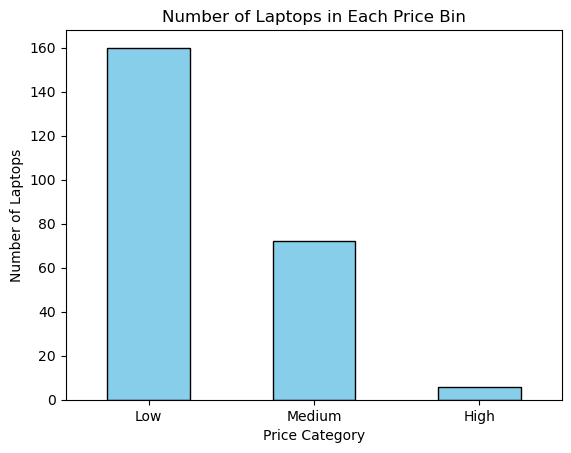

In [62]:
# Create 3 equal-width bins for Price
df['Price-binned'] = pd.cut(df['Price'], bins=3, labels=['Low', 'Medium', 'High'])

# Count and plot
price_counts = df['Price-binned'].value_counts().sort_index()

price_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Laptops in Each Price Bin')
plt.xlabel('Price Category')
plt.ylabel('Number of Laptops')
plt.xticks(rotation=0)
plt.show()
